<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция 4. Кейс-стади. Классификационные задачи.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline


Загрузим датасет 'Faulty-steel-plates' с kaggle: (ссылка - https://www.kaggle.com/uciml/faulty-steel-plates)

In [2]:
import io
import requests
url="http://yustiks.ru/faults.csv"
dataset_temp=pd.read_csv(url) 
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


В данном датасете 34 атрибута. Первые 27 атрибутов описывают некоторые несиправности стальной платы, которые были замечены в изображениях.

*    X_Minimum
*   X_Maximum
*    Y_Minimum
*    Y_Maximum
*    Pixels_Areas
*    X_Perimeter
*    Y_Perimeter
*    Sum_of_Luminosity
*    Minimum_of_Luminosity
*    Maximum_of_Luminosity
*    Length_of_Conveyer
*    TypeOfSteel_A300
*    TypeOfSteel_A400
*    Steel_Plate_Thickness
*    Edges_Index
*    Empty_Index
*    Square_Index
*    Outside_X_Index
*    Edges_X_Index
*    Edges_Y_Index
*    Outside_Global_Index
*    LogOfAreas
*    Log_X_Index
*    Log_Y_Index
*    Orientation_Index
*    Luminosity_Index
*    SigmoidOfAreas

Последние 7 колонок - это класс, к которому относится то или иное повреждение (one-hot-encoding). Например, если какой-либо элемент классифицируется как "Stains" (пятна), то в колонке 'Stains' 
будет стоять единица. Последние 7 атрибутов представляют собой класс для каждого элемента.

*    Pastry
*    Z_Scratch
*    K_Scatch
*    Stains
*    Dirtiness
*    Bumps
*    Other_Faults


Первые 27 колонок данной таблицы являются колонками для предсказаний класса.


In [3]:
data = dataset_temp.iloc[:,:27]
data[:4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212



Посмотрим частотный график данных колонок (график histograms):

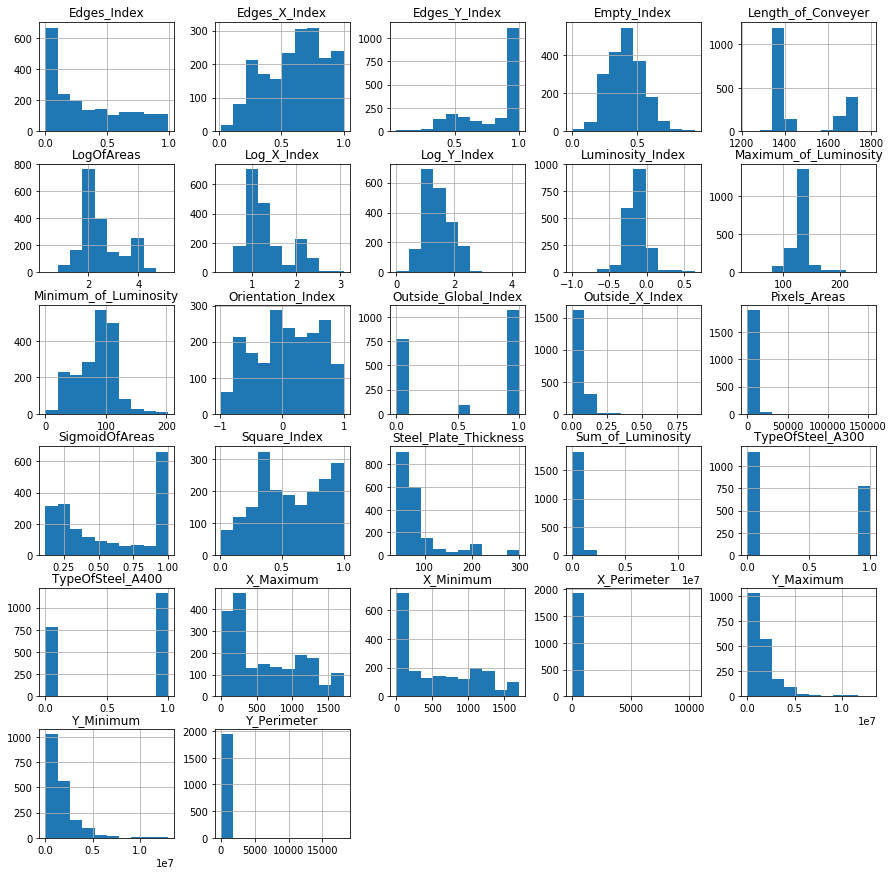

In [4]:
data.hist(figsize=(15,15))
plt.show()


Из данных графиков можно увидеть, что Outside_Global_Index, TypeOfSteel_A300, TypeOfSteel_A400 являются дискретными величинами со значениями [0, 0.5, 1], [0,1], [0,1] соответственно (распределение Бернулли).

Можно также заметить, что такие переменные, как Empty_Index, Log_Y_Index, Luminosity_Index являются нормальным распределением Гаусса.

Выделим колонки в отдельный список

In [5]:
headers = list(data.columns.values)

Нормализуем параметры

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


При нормализации стираются названия колонок, поэтому необходимо восстановить их:

In [7]:
df_norm.columns = headers
df_norm.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


In [8]:
len(df_norm)

1941

Построим матрицу корреляций:

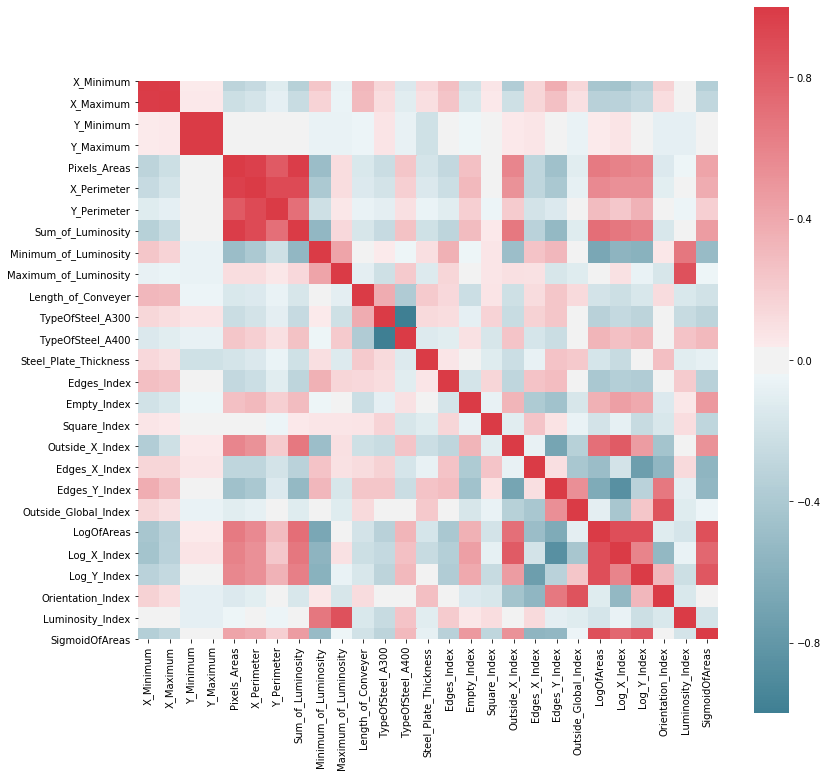

In [9]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Некоторые переменные сильно коррелированы (например, Sum_of_Luminosity и Pixels_areas)

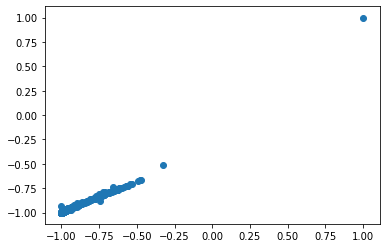

In [10]:
plt.scatter(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])
plt.show()

Корреляция Пирсона

In [11]:
from scipy.stats import pearsonr
pearsonr(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])

(0.9789516167596556, 0.0)

Удалим из таблицы значения с корреляцией, большей чем 95%: некоторые атрибуты имеют сильную корреляцию с другими атрибутами, нет смысла использовать два атрибута совместно.

In [12]:
# создаем матрицу корреляций
corr_matrix = df_norm.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400']


Удаляем колонки, которые не нужны:

In [13]:
df_norm = df_norm.drop(df_norm[to_drop], axis=1)
df_norm.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


После удаления остается 22 колонки:

In [14]:
df_norm.shape

(1941, 22)

Посмотреть разбиение по классам. Сколько элементов в каждом классе?

Pastry	Z_Scratch	K_Scatch	Stains	Dirtiness	Bumps	Other_Faults

In [15]:
print('Количество значений 1го класса: ', dataset_temp[dataset_temp['Pastry']==1].shape)
print('Количество значений 2го класса: ', dataset_temp[dataset_temp['Z_Scratch']==1].shape)
print('Количество значений 3го класса: ', dataset_temp[dataset_temp['K_Scatch']==1].shape)
print('Количество значений 4го класса: ', dataset_temp[dataset_temp['Stains']==1].shape)
print('Количество значений 5го класса: ', dataset_temp[dataset_temp['Dirtiness']==1].shape)
print('Количество значений 6го класса: ', dataset_temp[dataset_temp['Bumps']==1].shape)
print('Количество значений 7го класса: ', dataset_temp[dataset_temp['Other_Faults']==1].shape)


Количество значений 1го класса:  (158, 34)
Количество значений 2го класса:  (190, 34)
Количество значений 3го класса:  (391, 34)
Количество значений 4го класса:  (72, 34)
Количество значений 5го класса:  (55, 34)
Количество значений 6го класса:  (402, 34)
Количество значений 7го класса:  (673, 34)


Количество элементов в каждом классе отличается.

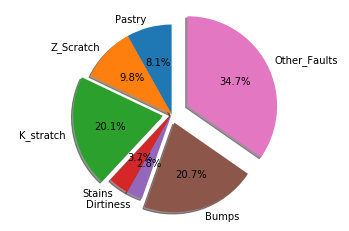

In [16]:
# Построем pie-график
labels = 'Pastry', 'Z_Scratch', 'K_stratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'
sizes = [158, 190, 391, 72, 55, 402, 673]
explode = (0, 0, 0.1, 0, 0, 0.1, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Так как есть несбалансированность классов, необходимо уравнять количество элементов в каждом классе засчет **генерирования новых (up-sampling)** или **удаления элементов (down-sampling)**.

С проблемой классификации с несбалансированными данными хорошо работает метод решения деревьев.

In [17]:
output_y = dataset_temp.iloc[:,27:]
#input_x = dataset_temp.iloc[:,:27]
input_x = df_norm

Таргет значение представим ввиде наименований классов.

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
dtype: int64


Выделим из датасета тренировочные и тестовые данные. 
Тренировочные данные будем использовать для обучения модели.
Тестовые данные будем использовать для подсчета качества модели.

In [19]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

No handles with labels found to put in legend.


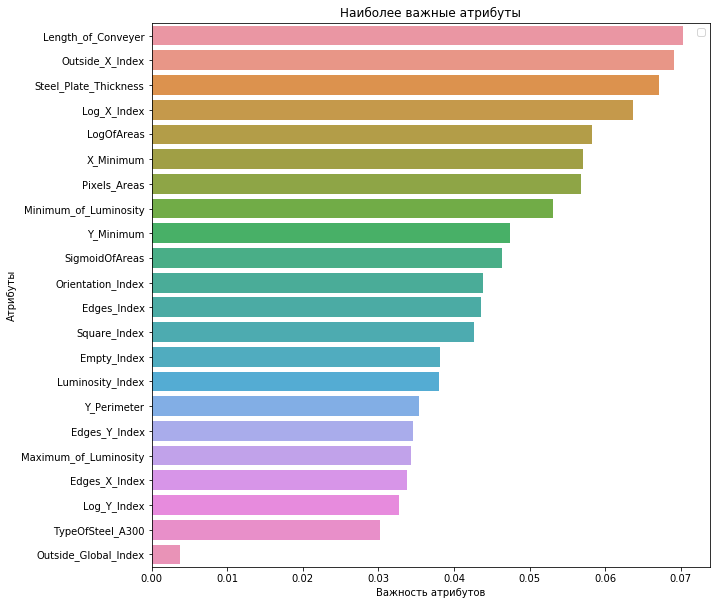

In [20]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Посчитаем качество модели:

In [21]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       117
           1       0.92      0.71      0.80        17
           2       0.96      0.95      0.95       112
           3       0.71      0.71      0.71       208
           4       0.57      0.69      0.62        42
           5       0.96      0.88      0.92        25
           6       0.90      0.89      0.89        62

    accuracy                           0.77       583
   macro avg       0.81      0.78      0.79       583
weighted avg       0.77      0.77      0.77       583



0.7667238421955404

Модель "рандомных деревьев" дала точность предсказания порядка 77%.

Мы можем сравнить с теми атрибутами, которые мы удалили, отсекая 10% максимально коррелированных элементов:

In [22]:
['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400']

['X_Maximum',
 'Y_Maximum',
 'X_Perimeter',
 'Sum_of_Luminosity',
 'TypeOfSteel_A400']

Получается, мы не удалили наиболее важные элементы для деревьев решений => хороший признак.

Можно отобразить классы (их всего 7) в 3D пространстве наиболее важных векторов (Length_of_Conveyer, Outside_X_Index, Log_X_Index):

In [23]:
df = df_norm
df['target'] = Y

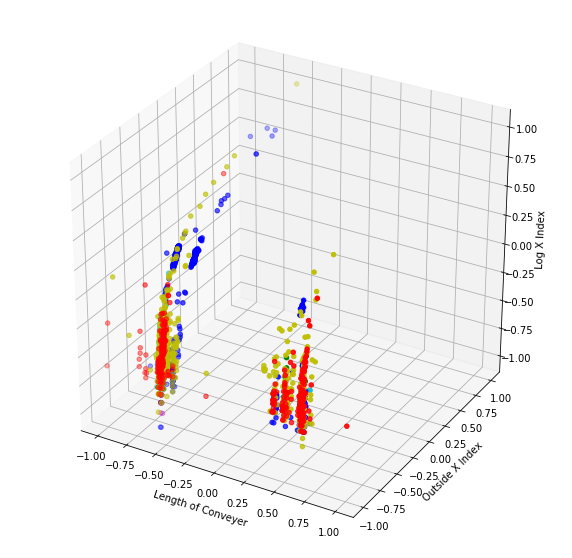

In [24]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf']

for i in range(7):
  
  a = df.loc[df['target'] == i, 'Length_of_Conveyer']
  b = df.loc[df['target'] == i, 'Outside_X_Index']
  c = df.loc[df['target'] == i, 'Log_X_Index']

  ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('Length of Conveyer')
ax.set_ylabel('Outside X Index')
ax.set_zlabel('Log X Index')
plt.show()

Можно также посмотреть распределение классов в 3D пространстве по другим атрибутам, например: 'Steel_Plate_Thickness', 'Edges_Index', 'Outside_Global_Index'

In [25]:
df = pd.DataFrame(input_x, columns = ['Steel_Plate_Thickness', 'Edges_Index', 'Outside_Global_Index'])
df['target'] = Y

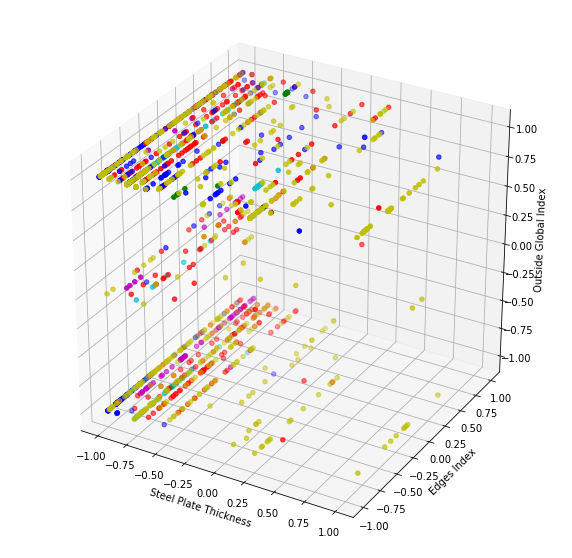

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf']

for i in range(7):
  
  a = df.loc[df['target'] == i, 'Steel_Plate_Thickness']
  b = df.loc[df['target'] == i, 'Edges_Index']
  c = df.loc[df['target'] == i, 'Outside_Global_Index']

  ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('Steel Plate Thickness')
ax.set_ylabel('Edges Index')
ax.set_zlabel('Outside Global Index')
plt.show()

Как же уменьшить количество атрибутов, при этом оставив данные в пространстве таким образом, чтобы легко можно было классифицировать?

# Принцип минимальных компонент

Почитать про метод - https://ru.wikipedia.org/wiki/Метод_главных_компонент

Соответственно, было 23 атрибута

In [27]:
print(df_norm.shape)

(1941, 23)


Создаем модель PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [29]:
principalComponents = pca.fit_transform(df_norm)
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3'])


После применения PCA осталось только 3 атрибута

In [30]:
projected_x['target'] = Y

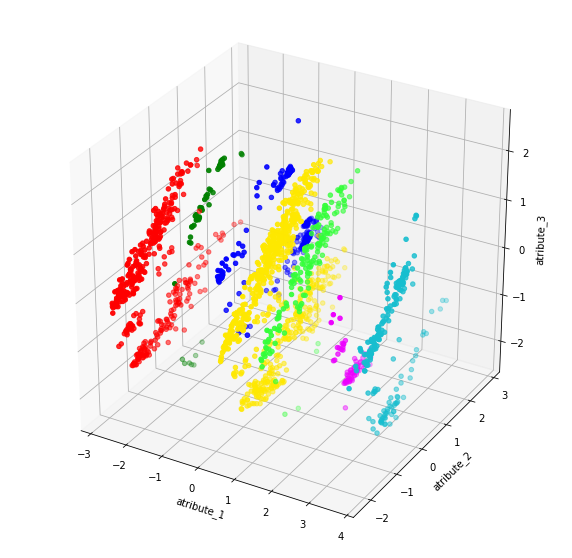

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', '#FFE800', '#33FF39', '#EC00FF', '#17becf']

for i in range(7):
    a = projected_x.loc[projected_x['target'] == i, 'atribute_1']
    b = projected_x.loc[projected_x['target'] == i, 'atribute_2']
    c = projected_x.loc[df['target'] == i, 'atribute_3']
    ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('atribute_1')
ax.set_ylabel('atribute_2')
ax.set_zlabel('atribute_3')
plt.show()

Классы расположены в пространстве так, что их можно идеально отличить друг от друга!

**Если бы данные не были нормированы, то мы получили бы совершенно другой результат!**

In [32]:
principalComponents = pca.fit_transform(dataset_temp.iloc[:,:27])
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3'])
projected_x['target'] = Y

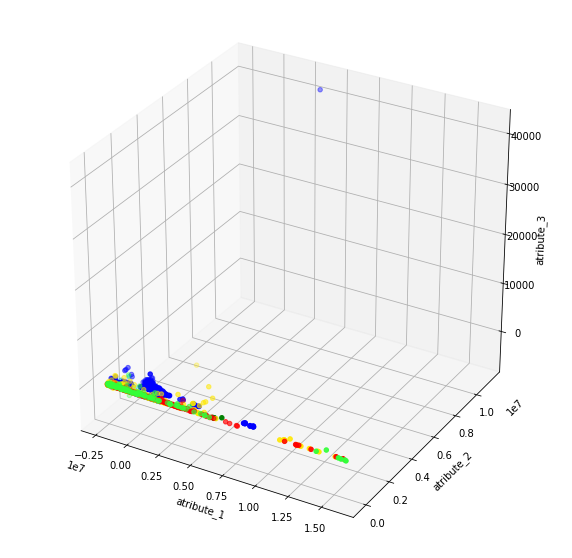

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', '#FFE800', '#33FF39', '#EC00FF', '#17becf']

for i in range(7):
    a = projected_x.loc[projected_x['target'] == i, 'atribute_1']
    b = projected_x.loc[projected_x['target'] == i, 'atribute_2']
    c = projected_x.loc[df['target'] == i, 'atribute_3']
    ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('atribute_1')
ax.set_ylabel('atribute_2')
ax.set_zlabel('atribute_3')
plt.show()

**Вывод:** при работае с методом минимальных компонент данные необходимо **нормировать**

# Методы работы с несбалансированными данными

Увеличим количество элементов в таблице для уравновешивания классов.

Будем использовать библиотеку imblearn

как установить в среде: https://imbalanced-learn.readthedocs.io/en/stable/install.html

Создадим тренировочный и тестовый датасет из исходных данных

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

Увеличим количество тренировочных данных (тестовые данные остаются нетронутыми)

In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

/home/orange/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/orange/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/orange/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be r

Количество элементов до операции: 1358
Количество элементов после операции: 3248


/home/orange/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/orange/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/orange/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/orange/venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_

Мы увеличили количество элементов, и уравняли классы по количеству

In [36]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 464, 1: 464, 2: 464, 3: 464, 4: 464, 5: 464, 6: 464}

Но в тестовых данных остается несбалансированность

In [37]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 117, 1: 16, 2: 102, 3: 209, 4: 53, 5: 19, 6: 67}

# Мультиклассовая логистическая регрессия

Применим алгоритм логистической регрессии:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       117
           1       1.00      0.81      0.90        16
           2       0.99      0.99      0.99       102
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        67

    accuracy                           0.99       583
   macro avg       0.99      0.97      0.98       583
weighted avg       0.99      0.99      0.99       583



/home/orange/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Если бы данные были **не нормированы**

In [39]:
input_x = dataset_temp.iloc[:,:27]
input_x = input_x.drop(input_x[to_drop], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset_temp.iloc[:,:27],
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [41]:
ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 1358
Количество элементов после операции: 3248


/home/orange/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.34      0.44      0.38       117
           1       0.00      0.00      0.00        16
           2       0.55      0.80      0.66       102
           3       0.44      0.58      0.50       209
           4       0.00      0.00      0.00        53
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        67

    accuracy                           0.44       583
   macro avg       0.19      0.26      0.22       583
weighted avg       0.32      0.44      0.37       583



/home/orange/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/orange/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Все очень плохо. 44% точности всего

# Модель Random Forest на сгенерированных данных

In [43]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_resampled, y_resampled)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       117
           1       0.87      0.81      0.84        16
           2       0.95      0.95      0.95       102
           3       0.73      0.77      0.75       209
           4       0.78      0.47      0.59        53
           5       0.95      0.95      0.95        19
           6       0.93      0.96      0.94        67

    accuracy                           0.80       583
   macro avg       0.84      0.81      0.82       583
weighted avg       0.80      0.80      0.79       583



Почему-то модель Random Forest показала результат не лучше, чем модель логистической регрессии.

# Пример кросс-валидации

Разделим датасет на 10 частей, предварительно перемешав все элементы между собой.

Будем проверять качество логистической регрессии с помощью кросс-валидации

In [44]:
shuffled = df_norm
shuffled = shuffled.sample(frac=1)
shuffled = shuffled.reset_index(drop=True)

In [45]:
from sklearn import metrics

part = len(shuffled)//10

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

mean_score = 0
for i in range(10):
    test = shuffled[i*part:(i+1)*part]
    train = shuffled.drop(shuffled.index[i*part:(i+1)*part])
    # обучаем модель
    train_x = train.drop(['target'], axis=1)
    train_y = train.target
    test_x = test.drop(['target'], axis=1)
    test_y = test.target
    model.fit(train_x, train_y)

    model_pred = model.predict(test_x)
    mean_score += metrics.accuracy_score(test_y, model_pred)
    
print(mean_score/10)

0.777319587628866


Кросс-валидация показала, что точность алгоритма деревьев решений 78%

# Кривая ROC-Curve

Загрузим датасет ирисов

In [78]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=["Sepal length", "Sepal width", "Petal length", "Petal width", 'species'])
data.head()

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Имеется 3 класса ирисов. Это многоклассовая проблема. Преобразуем данные в one-hot encoding:
каждый тип цветка будет представлен ввиде вектора длины 3 (1ый элемент - цветок iris-setosa, 2ой элемент - цветок iris-versicolor, 3-й - iris-virginica).

In [79]:
# преобразуем колонку species в one-hot encoding вектор
one_hot = pd.get_dummies(data['species'])
# Удаляем колонку species
data = data.drop('species',axis = 1)
# добавляем колонку one-hot к исходной таблице
data = data.join(one_hot)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


теперь каждая колонка (iris-setosa, iris-versicolor, iris-virginica) - это отдельная классификационная задача.
Допустим, мне нужно предсказать, является ли данный элемент iris-setosa видом.

In [80]:
X_df = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
X = np.array(data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']])
Y = np.array(data['Iris-setosa']).astype(int)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Допустим, мы используем модель Catboost (без нормирования данных) - https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html

0:	learn: 0.3562981	total: 11.1ms	remaining: 44.5ms
1:	learn: 0.2186071	total: 13.8ms	remaining: 20.8ms
2:	learn: 0.1787168	total: 127ms	remaining: 84.9ms
3:	learn: 0.1215151	total: 128ms	remaining: 32ms
4:	learn: 0.0896591	total: 129ms	remaining: 0us


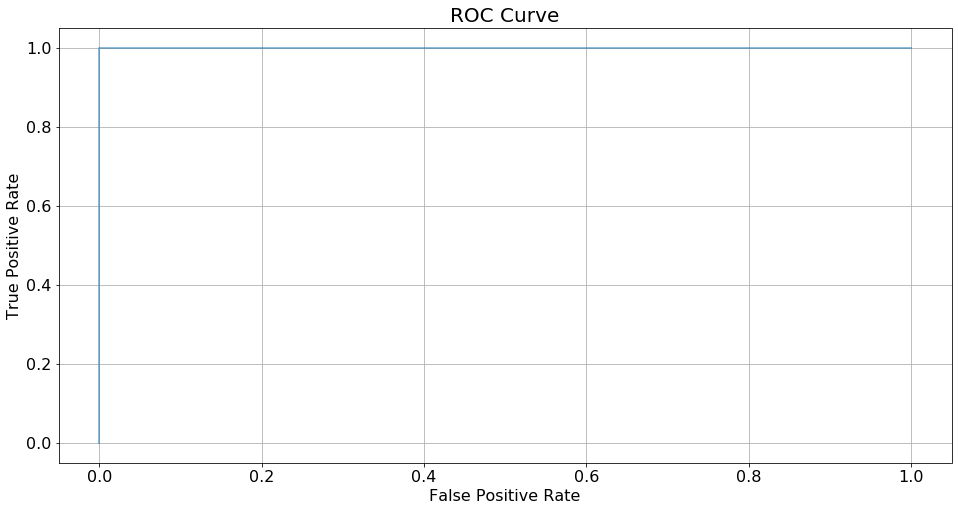

In [82]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

# создаем все атрибуты таблицы
cat_features = np.where(X_df.dtypes != np.float)[0]
train_data = X_train
train_labels = y_train
eval_data = X_test
catboost_pool = Pool(train_data, train_labels)

model = CatBoostClassifier(iterations=5,
                           learning_rate=1,
                           depth=16)
# обучаем модель
model.fit(train_data, train_labels, cat_features)
# получаем предсказания для классов
preds_class = model.predict(eval_data)

(fpr, tpr, thresholds) = get_roc_curve(model, catboost_pool, plot=True)

**Идеальный случай** - когда классификатор предсказывает со 100%-ой точностью

и действительно, если мы посмотрим classification report, так и есть:

In [83]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Ну что ж, 100%-тное качество модели. Будем считать, что мы создали идеальную модели для датасета. 

# ROC-кривая датасет пациентов с сердечными болезнями

In [51]:
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
X = data.drop('target', axis=1)
y = data.target

In [53]:
# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [54]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

В проблеме **классификации** модель предсказывает target значение, а также вероятность для данного класса. Отдельно вероятность предсказывается для каждого класса (их два в данном примерме: target 1 - человек здоров, target 0 -человек болен)

In [77]:
print('Предсказанный класс для тестовых данных (пациентов)')
print(model.predict(X_test))
print('Предсказанные вероятности для каждого класса (0 и 1 соответственно)')
print(model.predict_proba(X_test))

Предсказанный класс для тестовых данных (пациентов)
[0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0
 0 0]
Предсказанные вероятности для каждого класса (0 и 1 соответственно)
[[0.515715   0.484285  ]
 [0.07982885 0.92017115]
 [0.0271194  0.9728806 ]
 [0.40618651 0.59381349]
 [0.03320988 0.96679012]
 [0.08597297 0.91402703]
 [0.89910007 0.10089993]
 [0.010145   0.989855  ]
 [0.57240687 0.42759313]
 [0.77584873 0.22415127]
 [0.05829201 0.94170799]
 [0.33426127 0.66573873]
 [0.06972081 0.93027919]
 [0.99722092 0.00277908]
 [0.86390261 0.13609739]
 [0.25708703 0.74291297]
 [0.85293392 0.14706608]
 [0.09469168 0.90530832]
 [0.09615181 0.90384819]
 [0.42042577 0.57957423]
 [0.48833596 0.51166404]
 [0.98982109 0.01017891]
 [0.87062133 0.12937867]
 [0.98774165 0.01225835]
 [0.04858295 0.95141705]
 [0.10066321 0.89933679]
 [0.27962922 0.72037078]
 [0.72130887 0.27869113]
 [0.95878887 0.04121113]

/home/orange/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


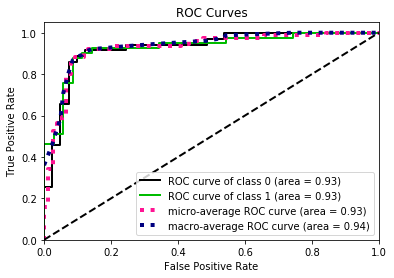

In [68]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

Text(0, 0.5, 'TPR')

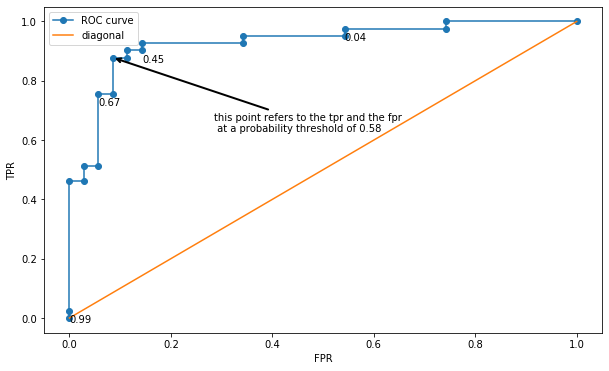

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas[:, 1])

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[1::5], tpr[1::5], thresholds[1::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 8
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

По графику получается, что можно отсекать все классы, вероятность предсказания которых (для target = 1) меньше 58%. 

Загрузим датасет "Цена на нефть"

In [88]:
url="http://yustiks.ru/dataset/BrentOilPrices.csv"
df=pd.read_csv(url)
df.tail()

,Date,Price
8211,"Sep 24, 2019",64.13
8212,"Sep 25, 2019",62.41
8213,"Sep 26, 2019",62.08
8214,"Sep 27, 2019",62.48
8215,"Sep 30, 2019",60.99


In [89]:
df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [91]:
def plot_price_trend(df, start_date, end_date):
    """
    This function filters the dataframe for the specified date range and 
    plots the line plot of the data using seaborn.
    
    The dataframe may not be indexed on any Datetime column.
    In this case, we use mask to filter out the date.
    
    PS - There is another function provided later in the notebook 
    which used indexed column to filter data
    """
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("Brent Oil Price Trend")

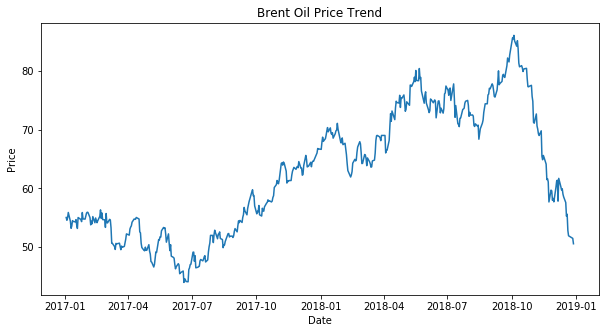

In [92]:
plot_price_trend(df,'2017-01-01','2019-01-01')

In [95]:
import  datetime
#Convert date coulmns to specific format
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y')
#Read csv file
url="http://yustiks.ru/dataset/BrentOilPrices.csv"
df = pd.read_csv(url,parse_dates=['Date'], date_parser=dateparse)

#Sort dataset by column Date
df = df.sort_values('Date')
df = df.groupby('Date')['Price'].sum().reset_index()
df.set_index('Date', inplace=True)
df=df.loc[datetime.date(year=2000,month=1,day=1):]

In [100]:
# Print some data rows.
df.tail()

,Price
Date,
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08
2019-09-27,62.48
2019-09-30,60.99


# Будем предсказывать показания не на каждый месяц, а на начальный день каждого месяца


Сделаем resample данных на начало каждого месяца

Метод resample('..') может принимать следующие значения

```
B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds
```

таким образом мы будем предсказывать только цену на начало месяца

In [101]:
y = df['Price'].resample('MS').mean()

In [103]:
y.tail()

Date
2019-05-01    71.317727
2019-06-01    64.220500
2019-07-01    63.919130
2019-08-01    59.041818
2019-09-01    62.826667
Freq: MS, Name: Price, dtype: float64

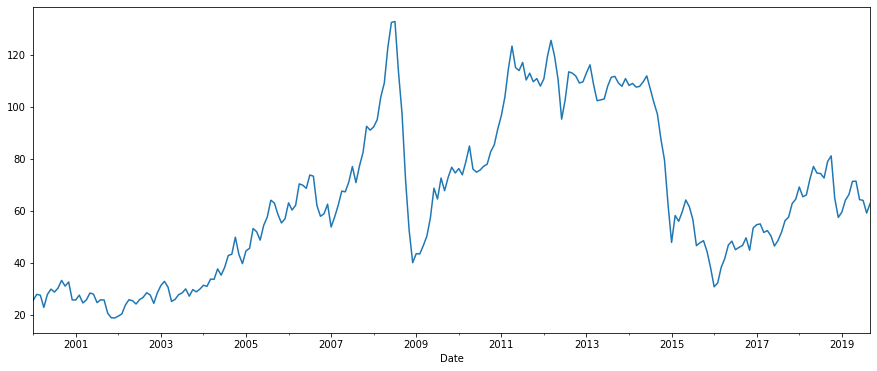

In [104]:
y.plot(figsize=(15, 6))
plt.show()

**Нормализуем данные**

In [106]:
# normalize the data_set 
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
df = sc.fit_transform(df)

**Делим датасет на тренировочный и на тестовый**

In [107]:
# split into train and test sets
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size, :], df[train_size:len(df), :]

**Создаем вектор из временных интервалов, с шагом = 1**

In [108]:
# convert an array of values into a data_set matrix def
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [109]:
# reshape into X=t and Y=t+1
look_back =90
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# 

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# create and fit the LSTM network regressor = Sequential() 
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 20, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)


Train on 3420 samples, validate on 1414 samples
Epoch 1/20
3420/3420 [==============================] - 38s 11ms/step - loss: 0.0046 - val_loss: 0.0622
Epoch 2/20
3420/3420 [==============================] - 33s 10ms/step - loss: 0.0128 - val_loss: 0.0991
Epoch 3/20
3420/3420 [==============================] - 30s 9ms/step - loss: 0.0203 - val_loss: 0.0908
Epoch 4/20
3420/3420 [==============================] - 30s 9ms/step - loss: 0.0178 - val_loss: 0.0711
Epoch 5/20
3420/3420 [==============================] - 24s 7ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 6/20
3420/3420 [==============================] - 36s 10ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 7/20
3420/3420 [==============================] - 36s 10ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 8/20
3420/3420 [==============================] - 35s 10ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 9/20
3420/3420 [==============================] - 29s 8ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch 10/20
3420/34

In [113]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [114]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

Train Mean Absolute Error: 1.8298781738058172
Train Root Mean Squared Error: 2.464084541222158
Test Mean Absolute Error: 1.618072630411496
Test Root Mean Squared Error: 2.0503372360798884


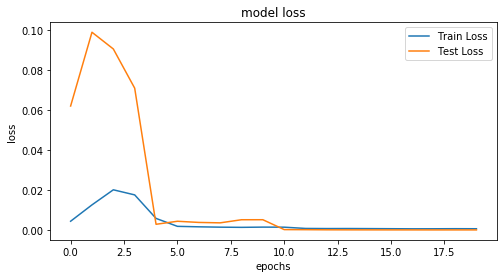

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

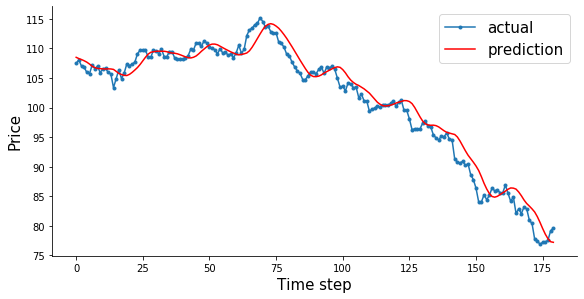

In [117]:
#Compare Actual vs. Prediction
aa=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:180], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:180], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();